<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Time Series: Moving Statistics


In [21]:
import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

## Load the Unemployment data set. Perform any necessary cleaning and preprocess the data by creating a `datetime` index.

In [22]:
unemp = pd.read_csv('./data/unemployment.csv')
unemp.head()

,Quarter,Seasonally adjusted quarterly U.S. unemployment rates from 1948 to 1993
0,1948Q1,3.733%
1,1948Q2,3.667%
2,1948Q3,3.767%
3,1948Q4,3.833%
4,1949Q1,4.667%


In [23]:
unemp.tail()

,Quarter,Seasonally adjusted quarterly U.S. unemployment rates from 1948 to 1993
170,1990Q3,5.6%
171,1990Q4,5.9%
172,1991Q1,6.5%
173,1991Q2,6.833%
174,Seasonally adjusted quarterly U.S. unemploymen...,NaN


In [24]:
# Drop messed up last row
unemp.drop(174, inplace=True)
unemp.tail()

,Quarter,Seasonally adjusted quarterly U.S. unemployment rates from 1948 to 1993
169,1990Q2,5.333%
170,1990Q3,5.6%
171,1990Q4,5.9%
172,1991Q1,6.5%
173,1991Q2,6.833%


In [25]:
# Check for additional nulls


In [26]:
# Simplify column names
unemp.columns = ['year_quarter', 'unemployment_rate']
unemp.head()

,year_quarter,unemployment_rate
0,1948Q1,3.733%
1,1948Q2,3.667%
2,1948Q3,3.767%
3,1948Q4,3.833%
4,1949Q1,4.667%


In [27]:
# Convert unemployment rate to float
unemp_rate_float = (
    unemp.loc[:, 'unemployment_rate'].str.replace('%', '').apply(float)
)
unemp.loc[:, 'unemployment_rate'] = unemp_rate_float

In [28]:
unemp.head()

,year_quarter,unemployment_rate
0,1948Q1,3.733
1,1948Q2,3.667
2,1948Q3,3.767
3,1948Q4,3.833
4,1949Q1,4.667


In [29]:
unemp.dtypes

year_quarter          object
unemployment_rate    float64
dtype: object

In [30]:
# Check data types
unemp.dtypes

year_quarter          object
unemployment_rate    float64
dtype: object

In [32]:
# Converting to datetime using .dt.to_period('Q')
pd.to_datetime(unemp.loc[:, 'year_quarter']).dt.to_period('Q')
unemp.loc[:, 'year_quarter'] = pd.to_datetime(unemp.loc[:, 'year_quarter']).dt.to_period('Q')

In [35]:
# Confirm that objects in index are correct datetimes
unemp.set_index('year_quarter', inplace=True)


KeyError: 'year_quarter'

In [37]:
unemp.index

PeriodIndex(['1948Q1', '1948Q2', '1948Q3', '1948Q4', '1949Q1', '1949Q2',
             '1949Q3', '1949Q4', '1950Q1', '1950Q2',
             ...
             '1989Q1', '1989Q2', '1989Q3', '1989Q4', '1990Q1', '1990Q2',
             '1990Q3', '1990Q4', '1991Q1', '1991Q2'],
            dtype='period[Q-DEC]', name='year_quarter', length=174, freq='Q-DEC')

In [38]:
unemp.index.month

Int64Index([ 3,  6,  9, 12,  3,  6,  9, 12,  3,  6,
            ...
             3,  6,  9, 12,  3,  6,  9, 12,  3,  6],
           dtype='int64', name='year_quarter', length=174)

In [40]:
# Plot the unemployment rate
fig, ax = plt.subplots(figsize(12, 5))
unemp.plot(ax=ax);

NameError: name 'figsize' is not defined

## Rolling Statistics

In [41]:
# Calculate yearly means
yearly_mean = unemp.loc[:, 'unemployment_rate'].resample('A').mean()

Rolling means are used to smooth out noise in time series data and highlight overall trends.

A **simple rolling mean** with **window size** $n$ is the average of the $n$ previous values.

In [45]:
# Extract three-year simple rolling means
three_year_rolling_mean = yearly_mean.rolling(window = 3, center=False).mean()

**Exercise.** Why are the first two values null?

its rolling, when window is 3 you can't calculate mean for 1948 , 1949

---

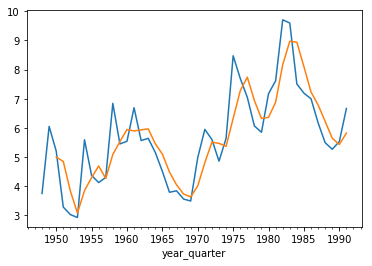

In [46]:
# Plot the yearly mean and three-year rolling mean together
fig, ax = plt.subplots()
yearly_mean.plot(ax=ax)
three_year_rolling_mean.plot(ax=ax);

**Exercise.** Why does the rolling mean appear to lag behind the original series?

**Exercise.**

- Calculate the simple rolling mean with `window=5` and `window=15`. Plot both together with the original data.

- Recreate the plot above but with the rolling medians (of the annual means) instead of rolling means.

- Why might you want to use a rolling median instead of a rolling mean or vice versa?

Medians are less sensitive to extreme values. If extreme values are noise that you want to smooth away, use a median. If they are real phenomena that you want to preserve, use a mean.

- **Bonus:** Use the syntax illustrated below to a legend to one or both of your figures above.

---

A **centered rolling mean** with window size $n$ is the average of the $n$ values centered on the current time step.

In [ ]:
# Extract three-year centered rolling means


In [ ]:
# Plot the yearly mean, three-year simple rolling mean, and three year centered rolling mean


**Exercise.** What differences do you notice between the simple rolling mean and the centered rolling mean? Can you think of any advantages for the simple rolling mean?

---

A **weighted rolling mean** treats some values as more important than others.

The most common kind of weighted rolling mean is an **exponentially weighted moving average**, in which weights decay exponentially as you go back in time.

The weight placed on an observation $s$ time steps in the past in an exponentially weighted moving average is proportional to $(1-\alpha)^s$ for some **decay rate** alpha. For instance, with $\alpha=.1$, the exponentially weighted moving average of $x$ at time $t$ would be proportional to the following sum:

$$EMA_t \propto x_t + .9*x_{t-1} + .9^2*x_{t-2} + .9^3*x_{t-2} + \ldots$$

The weights have to sum to 1, so to replace the proportionality with equality you would have to divide by the sum of the weights:

$$EMA_t = \frac{x_t + .9*x_{t-1} + .9^2*x_{t-2} + .9^3*x_{t-2} + \ldots}{1 + .9 + .9^2 + \ldots}$$

In [ ]:
# Plot weights in an exponentially weighted moving average over 20 items


**Implications:**

- The greater the decay rate $\alpha$ is (between zero and one), the more weight the moving average places on the most recent observations. (Change alpha in the plot above to illustrate this fact.)
- A single observation continues to influence an exponentially weighted rolling mean forever (but less and less and less...), unlike an unweighted rolling mean in which it eventually falls outside the window.
- The standard exponentially weighted moving average lags behind the time series.

Sometimes the weight is described in terms of **span** or **half-life**. We will use span:

$$span = 2/\alpha - 1$$

An exponentially weighted moving average with span $n$ is commonly called e.g. a "$n$-day" exponentially weighted moving average (for daily data); about 86% of the weight falls on the time periods within the span.

In [ ]:
# Calculate 10-year exponentially weighted moving average of unemployment


In [ ]:
# Plot the 10-year exponentially weighted moving average of unemployment with the yearly average


## Expanding Statistics

The **expanding mean** at a given time is the mean of all values up to that time.

In [ ]:
# Calculate the expanding mean of unemployment


In [ ]:
# Plot the expanding mean against the yearly mean


## Differencing

We are often interested in the **change** in a time series, as in this example:

![](./assets/jobs_change.png)

[Source](https://fivethirtyeight.com/features/the-u-s-job-market-is-on-a-historic-growth-streak/)

There's a Pandas method for that: `.diff`

In [ ]:
# Diff the unemployment rate


In [ ]:
# Plot unemployment rate and its differences in vertically arranged subplots


Differencing can be used to **detrend** a time series:

In [ ]:
x = range(200)
y = x + 10*np.random.randn(200)
diff = pd.Series(y).diff()

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(14, 7))
ax0.plot(x, y)
ax1.plot(x, diff);

A constant trend in a time series simply becomes the mean of the differenced time series.

Many time series modeling techniques assume that there is no trend, so detrending by differencing can be a useful preprocessing step.

# Questions?

# [Exit Tickets](https://docs.google.com/forms/d/1BW4rVsCx8Nzp3q2B7SQ_tL1xqKZr4GGoQ5qeZfayxh4/viewform?ts=5ad40144&edit_requested=true)